In [1]:
import numpy as np
import pandas as pd
import os
from sklearn import preprocessing
import warnings
import matplotlib.pyplot as plt
plt.style.use("fast")

%matplotlib inline
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
columns = ["id","state","account_length","area_code","international_plan","voice_mail_plan","number_vmail_messages","total_day_minutes","total_day_calls","total_day_charge","total_eve_minutes","total_eve_calls","total_eve_charge","total_night_minutes","total_night_calls","total_night_charge","total_intl_minutes","total_intl_calls","total_intl_charge","number_customer_service_calls","churn"]

In [3]:
path = 'D:/Documentos/datascience/pythonspark/projetochurn/datasets/'

In [4]:
#arq_teste = pd.read_csv(os.path.join(path,'projeto4_telecom_teste.csv'), sep = ',')
arq_treino = pd.read_csv(os.path.join(path,'projeto4_telecom_treino.csv'),sep=',')
arq_treino.columns = columns
#arq_teste.columns = columns

In [5]:
arq_treino.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [6]:
arq_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
id                               3333 non-null int64
state                            3333 non-null object
account_length                   3333 non-null int64
area_code                        3333 non-null object
international_plan               3333 non-null object
voice_mail_plan                  3333 non-null object
number_vmail_messages            3333 non-null int64
total_day_minutes                3333 non-null float64
total_day_calls                  3333 non-null int64
total_day_charge                 3333 non-null float64
total_eve_minutes                3333 non-null float64
total_eve_calls                  3333 non-null int64
total_eve_charge                 3333 non-null float64
total_night_minutes              3333 non-null float64
total_night_calls                3333 non-null int64
total_night_charge               3333 non-null float64
total_intl_minutes           

In [7]:
#total states
arq_treino.groupby("state").head()


,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,633,ND,68,area_code_408,no,yes,22,82.5,97,14.03,...,94,24.64,180.0,114,8.10,4.8,4,1.30,3,no
640,641,ND,88,area_code_415,no,no,0,161.5,92,27.46,...,108,14.75,206.2,95,9.28,7.9,4,2.13,2,no
664,665,ND,147,area_code_408,no,no,0,205.3,95,34.90,...,128,14.17,240.6,84,10.83,7.8,4,2.11,1,no
710,711,TN,69,area_code_510,no,no,0,195.3,70,33.20,...,108,18.42,259.9,119,11.70,12.5,4,3.38,3,no


In [8]:
arq_teste = arq_treino.iloc[:,6:-1]
arq_teste['state'] = arq_treino['state']
arq_teste.head()


,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,state
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,KS
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,OH
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,NJ
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,OH
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,OK


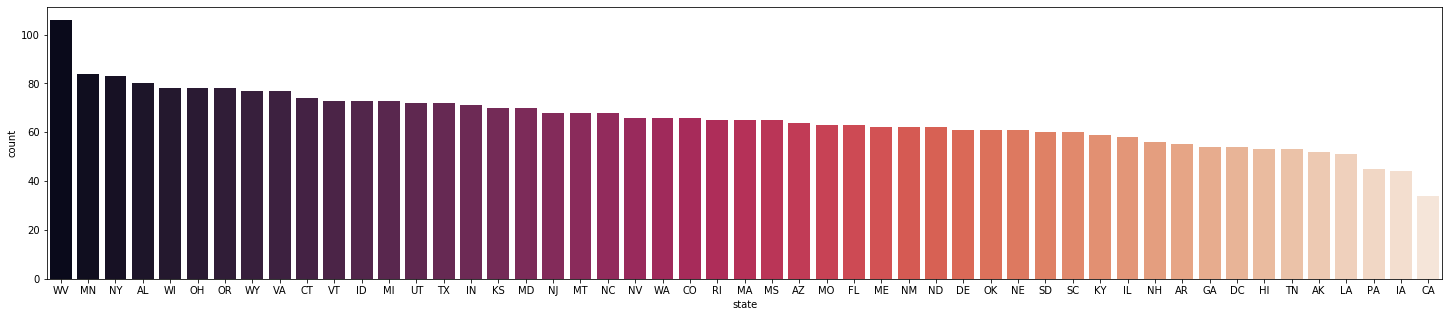

In [9]:
#state analyze
fig, ax = plt.subplots(figsize=(25,5))
sns.countplot(x='state', data=arq_treino, order = arq_treino['state'].value_counts().index, palette='rocket')

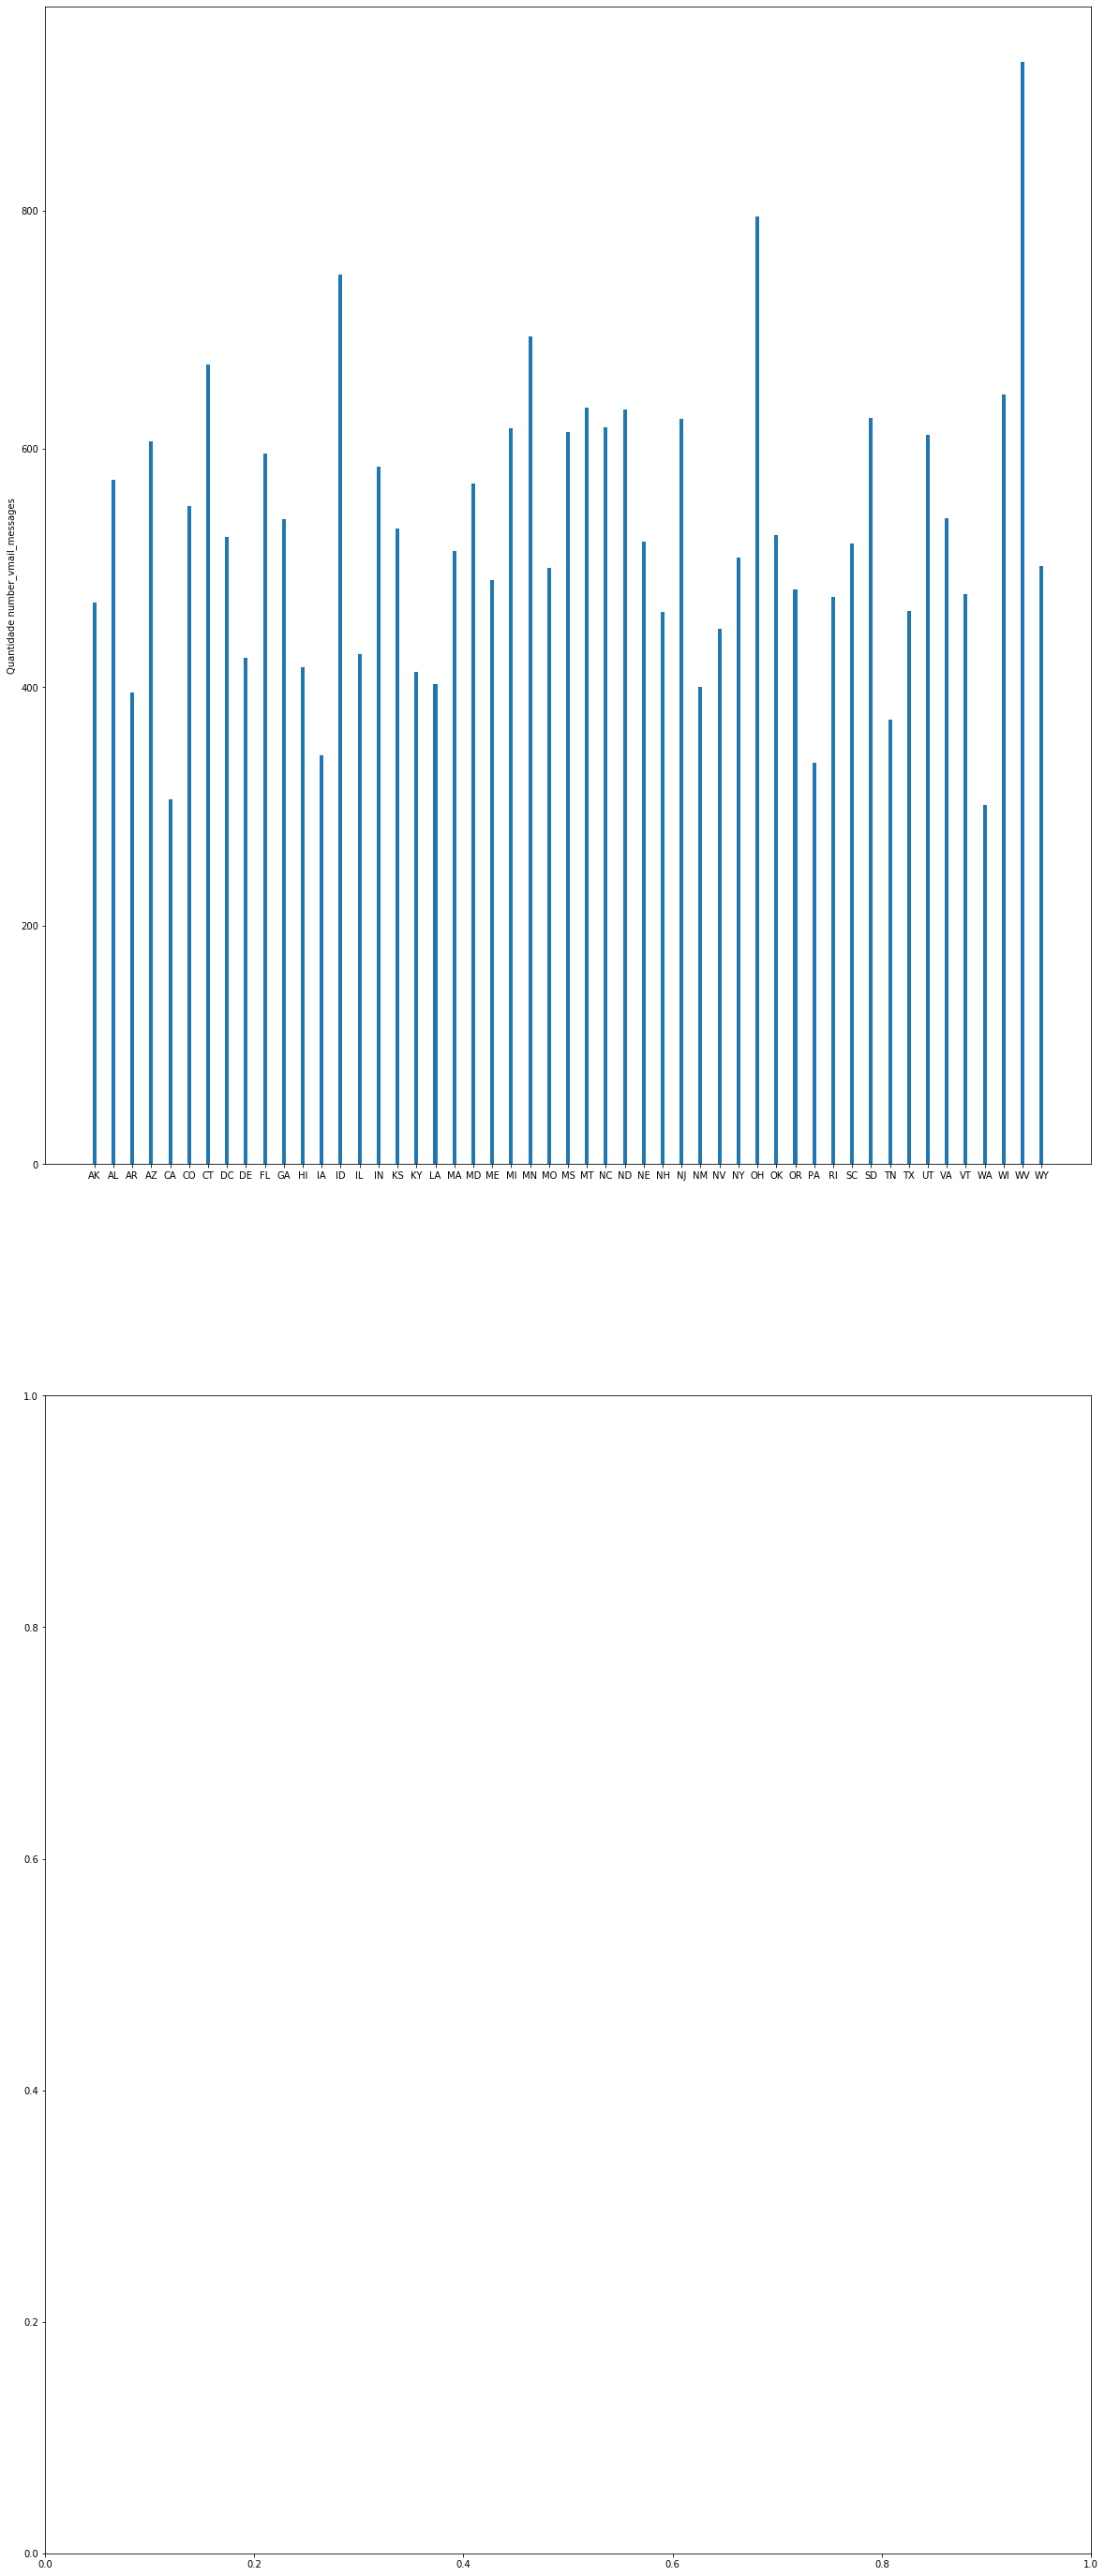

In [10]:
fig, ax = plt.subplots(2,1,figsize=(20,50))

pos = 0
number_vmail_state = arq_teste.groupby("state")['number_vmail_messages'].sum()
teste = np.arange(len(number_vmail_state.index))
ax[pos].bar(teste, number_vmail_state.values, align='center', width=0.2)
ax[pos].set_xticks(teste)
ax[pos].set_xticklabels(number_vmail_state.index)
#ax.invert_yaxis()  # labels read top-to-bottom
ax[pos].set_ylabel('Quantidade number_vmail_messages')
pos += 1

#number_vmail_state = arq_teste.groupby("state")['total_day_minutes'].sum()
#teste = np.arange(len(number_vmail_state.index))
#ax[pos].bar(teste, number_vmail_state.values, align='center', width=0.2)
#ax[pos].set_xticks(teste)
#ax[pos].set_xticklabels(number_vmail_state.index)
##ax.invert_yaxis()  # labels read top-to-bottom
#ax[pos].set_ylabel('Quantidade number_vmail_messages')


plt.show()



In [10]:
#arq_treino[arq_treino['state']=='AK']['number_vmail_messages'].sum()

In [11]:

number_vmail_state = arq_treino.groupby("state")['number_vmail_messages'].sum()

In [12]:
number_vmail_state.values

array([471, 574, 396, 606, 306, 552, 671, 526, 425, 596, 541, 417, 343,
       746, 428, 585, 533, 413, 403, 514, 571, 490, 617, 694, 500, 614,
       635, 618, 633, 522, 463, 625, 400, 449, 509, 795, 528, 482, 337,
       476, 521, 626, 373, 464, 612, 542, 478, 301, 646, 925, 502],
      dtype=int64)

Figure(432x288)


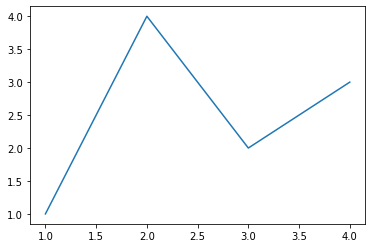

In [13]:
fig, ax = plt.subplots() # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])
print(fig)



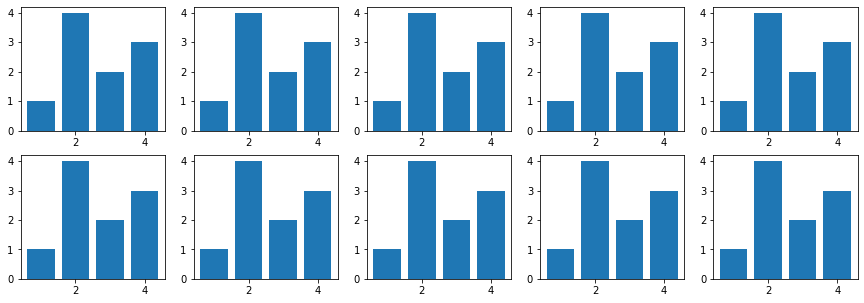

In [107]:
fig,axs = plt.subplots(2,5,figsize=(15,5))

for i in range(0,2):
    for j in range(0,5):
        axs[i][j].bar([1, 2, 3, 4], [1, 4, 2, 3])

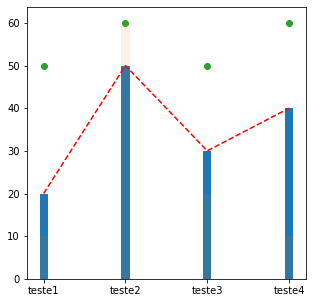

In [66]:
values = [20,50,30,40]
names = ['teste1','teste2', 'teste3','teste4']
line = [10,60,20,10]
scatter = [50,60,50,60]
#figsize=(10,5)
fig,axs = plt.subplots(figsize=(5,5))

axs.bar(names,values,width=0.1,)
axs.bar(names,line,width=0.1, alpha=0.1)
axs.plot(names,values,'r--')
axs.scatter(names,scatter)



In [146]:
arq_treino.groupby("state")[['churn']].count().head()

,churn
state,
AK,52
AL,80
AR,55
AZ,64
CA,34


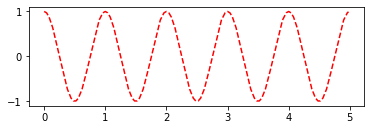

In [222]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)
t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)
plt.figure()
plt.subplot(111)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')
plt.subplot(211)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()


### State

In [11]:
df_state = arq_treino.copy()

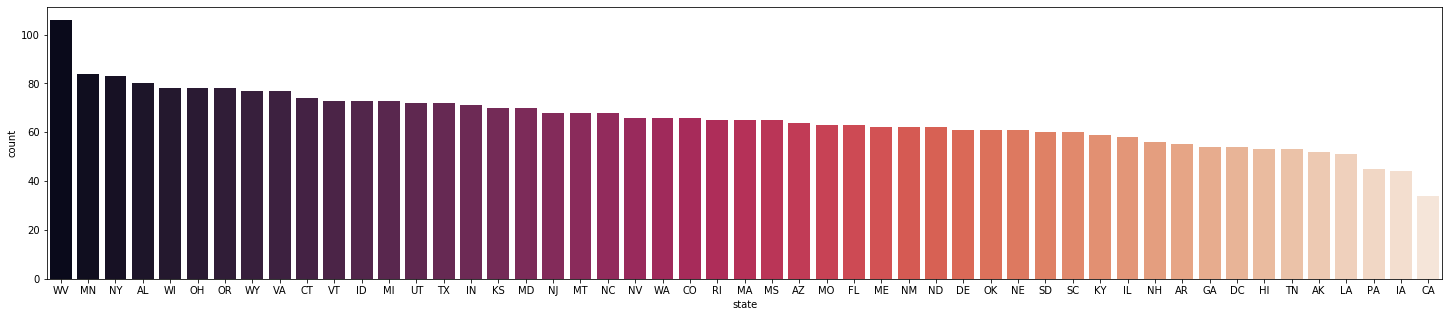

In [12]:
#top state count
# O estado com maior frequencia no dataset pe i WV (West Virginia)
fig, ax = plt.subplots(figsize=(25,5))
sns.countplot(x='state', data=df_state, order = df_state['state'].value_counts().index, palette='rocket')

In [33]:
df_state[df_state['churn']=='yes'].groupby('state')['churn'].count().values.max() #18
#df_state[df_state['churn']=='no'].groupby('state')['churn'].count().values.max() #96

#df_state[df_state['international_plan']=='yes'].groupby('state')['international_plan'].count().values.max()

18

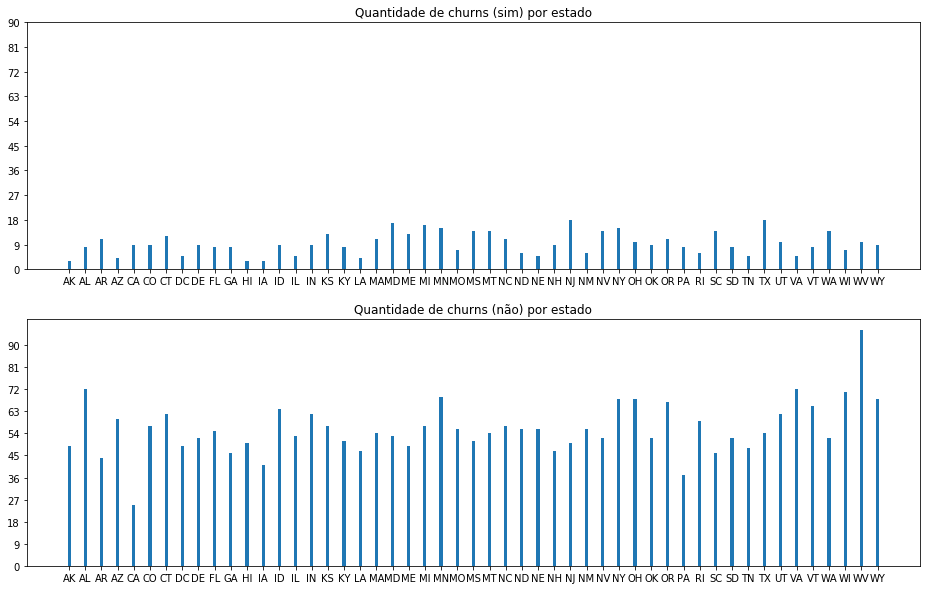

In [29]:
#Estados com mais churns
fig, ax = plt.subplots(2,1,figsize=(16,10))
states_yes = df_state[df_state['churn']=='yes'].groupby('state')['churn'].count()
states_yes_arange = np.arange(len(states_yes.index))
ax[0].bar(states_yes_arange, states_yes.values, align='center', width=0.2)
ax[0].set_xticks(states_yes_arange)
ax[0].set_xticklabels(states_yes.index)
ax[0].set_title('Quantidade de churns (sim) por estado')


states_no = df_state[df_state['churn']=='no'].groupby('state')['churn'].count()
states_no_arange = np.arange(len(states_no.index))
ax[1].bar(states_no_arange, states_no.values, align='center', width=0.2)
ax[1].set_xticks(states_no_arange)
ax[1].set_xticklabels(states_no.index)
ax[1].set_title('Quantidade de churns (não) por estado')

maxi = max(states_yes.values.max(),states_no.values.max())
ax[1].set_yticks(range(0,maxi,int(maxi/10)))
ax[0].set_yticks(range(0,maxi,int(maxi/10)))

plt.show()

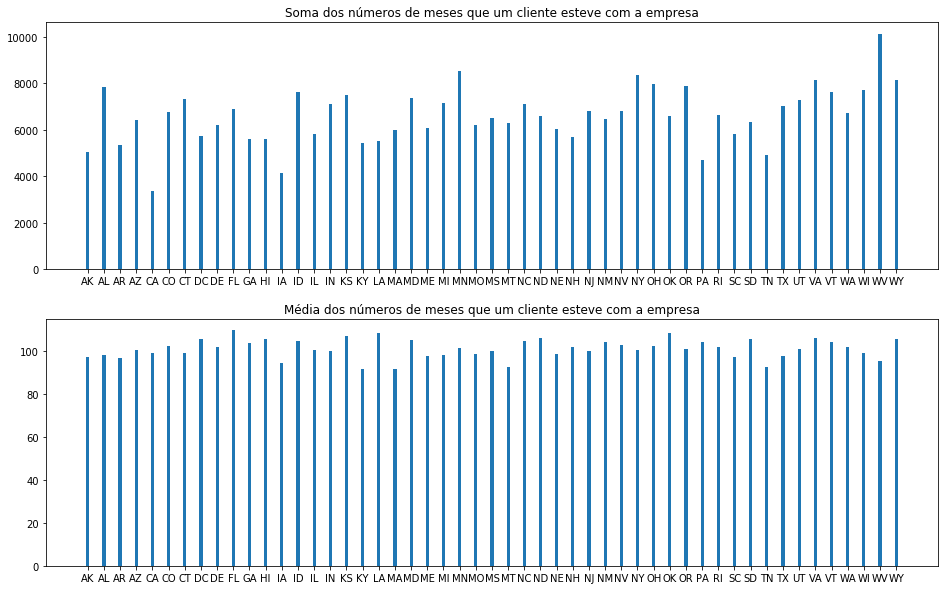

In [14]:
#estados com mais account_length (numero de meses que o clustente esteve com a provedora)

fig, ax = plt.subplots(2,1,figsize=(16,10))
states_account = df_state.groupby('state')['account_length'].sum()
states_account_arange = np.arange(len(states_account.index))
ax[0].bar(states_account_arange, states_account.values, align='center', width=0.2)
ax[0].set_xticks(states_account_arange)
ax[0].set_xticklabels(states_account.index)
ax[0].set_title('Soma dos números de meses que um cliente esteve com a empresa por estado')

states_account = df_state.groupby('state')['account_length'].mean()
states_account_arange = np.arange(len(states_account.index))
ax[1].bar(states_account_arange, states_account.values, align='center', width=0.2)
ax[1].set_xticks(states_account_arange)
ax[1].set_xticklabels(states_account.index)
ax[1].set_title('Média dos números de meses que um cliente esteve com a empresa por estado')


plt.show()

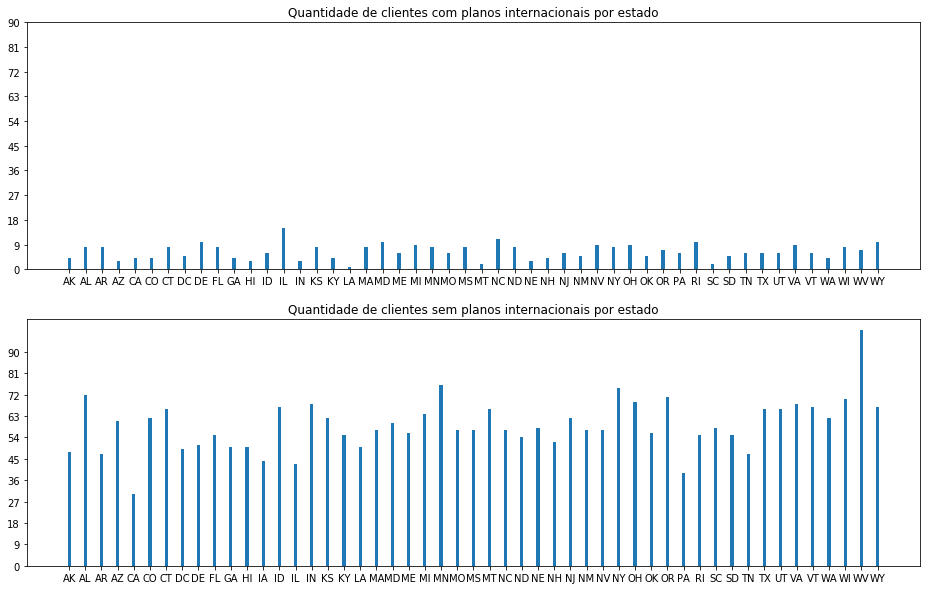

In [30]:
#Estados com clientes com mais planos internacionais
fig, ax = plt.subplots(2,1,figsize=(16,10))
states_yes = df_state[df_state['international_plan']=='yes'].groupby('state')['international_plan'].count()
states_yes_arange = np.arange(len(states_yes.index))
ax[0].bar(states_yes_arange, states_yes.values, align='center', width=0.2)
ax[0].set_xticks(states_yes_arange)
ax[0].set_xticklabels(states_yes.index)
ax[0].set_title('Quantidade de clientes com planos internacionais por estado')


states_no = df_state[df_state['international_plan']=='no'].groupby('state')['international_plan'].count()
states_no_arange = np.arange(len(states_no.index))
ax[1].bar(states_no_arange, states_no.values, align='center', width=0.2)
ax[1].set_xticks(states_no_arange)
ax[1].set_xticklabels(states_no.index)
ax[1].set_title('Quantidade de clientes sem planos internacionais por estado')


maxi = max(states_yes.values.max(),states_no.values.max())
ax[1].set_yticks(range(0,maxi,int(maxi/10)))
ax[0].set_yticks(range(0,maxi,int(maxi/10)))

plt.show()

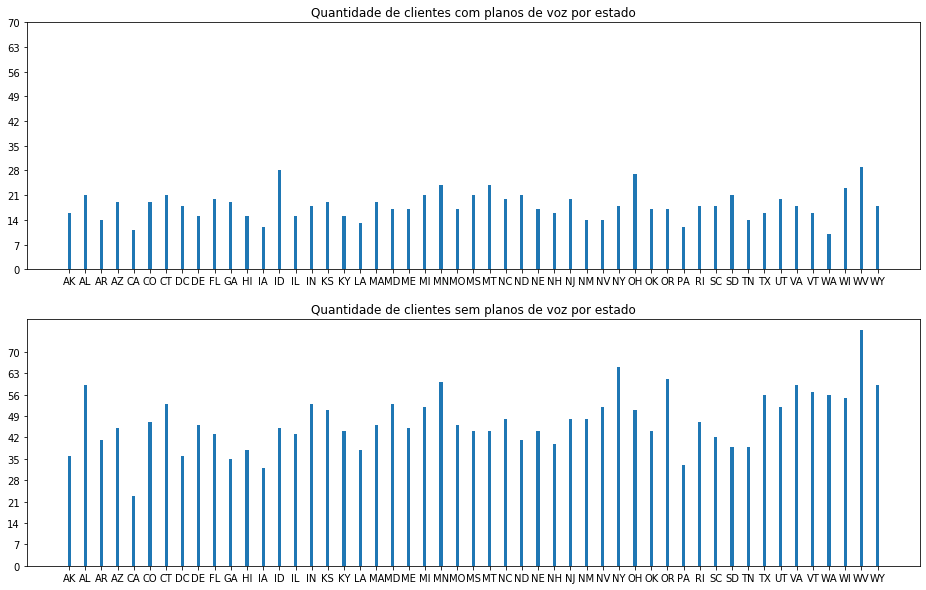

In [35]:
#Estados com clientes com mais planoss
fig, ax = plt.subplots(2,1,figsize=(16,10))
states_yes = df_state[df_state['voice_mail_plan']=='yes'].groupby('state')['voice_mail_plan'].count()
states_yes_arange = np.arange(len(states_yes.index))
ax[0].bar(states_yes_arange, states_yes.values, align='center', width=0.2)
ax[0].set_xticks(states_yes_arange)
ax[0].set_xticklabels(states_yes.index)
ax[0].set_title('Quantidade de clientes com planos de voz por estado')


states_no = df_state[df_state['voice_mail_plan']=='no'].groupby('state')['voice_mail_plan'].count()
states_no_arange = np.arange(len(states_no.index))
ax[1].bar(states_no_arange, states_no.values, align='center', width=0.2)
ax[1].set_xticks(states_no_arange)
ax[1].set_xticklabels(states_no.index)
ax[1].set_title('Quantidade de clientes sem planos de voz por estado')


maxi = max(states_yes.values.max(),states_no.values.max())
ax[1].set_yticks(range(0,maxi,int(maxi/10)))
ax[0].set_yticks(range(0,maxi,int(maxi/10)))

plt.show()

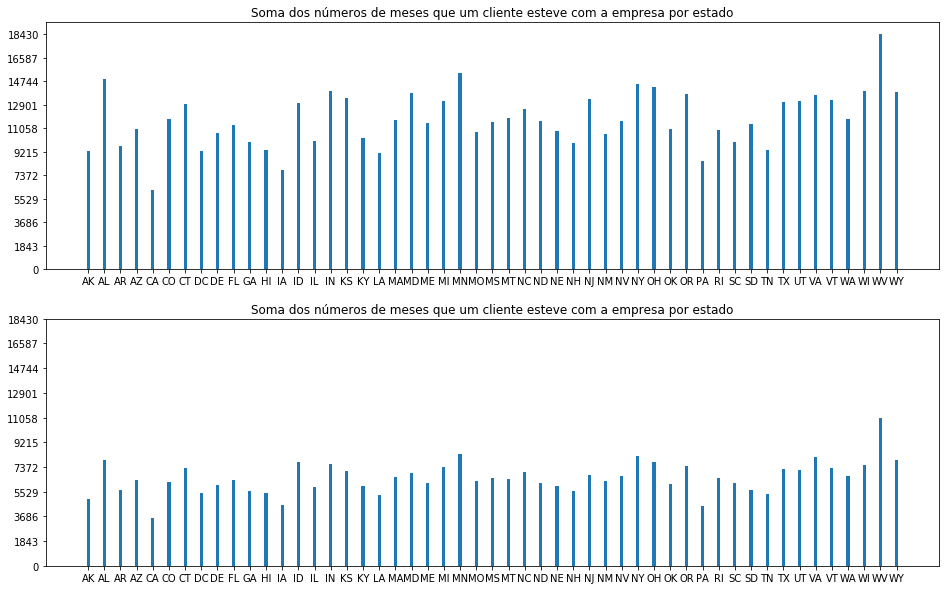

In [128]:
#total day calls and total day minutes

fig, ax = plt.subplots(2,1,figsize=(16,10))
states_d_minutes = df_state.groupby('state')['total_day_minutes'].sum()
states_d_minutes_arange = np.arange(len(states_account.index))
ax[0].bar(states_d_minutes_arange, states_d_minutes.values, align='center', width=0.2)
ax[0].set_xticks(states_d_minutes_arange)
ax[0].set_xticklabels(states_d_minutes.index)
ax[0].set_title('Soma dos números de meses que um cliente esteve com a empresa por estado')

states_d_calls = df_state.groupby('state')['total_day_calls'].sum()
states_d_calls_arange = np.arange(len(states_account.index))
ax[1].bar(states_d_calls_arange, states_d_calls.values, align='center', width=0.2)
ax[1].set_xticks(states_d_calls_arange)
ax[1].set_xticklabels(states_d_calls.index)
ax[1].set_title('Soma dos números de meses que um cliente esteve com a empresa por estado')


maxi = max(states_d_minutes.values.max(),states_d_calls.values.max())
ax[0].set_yticks(range(0,int(maxi),int(maxi/10)))
ax[1].set_yticks(range(0,int(maxi),int(maxi/10)))

plt.show()


In [131]:
pd.DataFrame(df_state.groupby('state')['total_day_minutes'].mean()).T

state,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
total_day_minutes,178.384615,186.01,176.116364,171.604687,183.564706,178.712121,175.140541,171.37963,174.583607,179.533333,...,189.69,175.771698,181.516667,183.569444,177.244156,182.031507,178.742424,179.130769,173.950943,180.17013


In [132]:
pd.DataFrame(df_state.groupby('state')['total_day_calls'].mean()).T

state,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
total_day_calls,95.269231,99.1,102.145455,100.109375,104.5,95.121212,98.432432,100.166667,98.639344,101.0,...,94.816667,101.45283,99.986111,98.958333,105.363636,100.328767,101.19697,96.679487,103.783019,102.220779


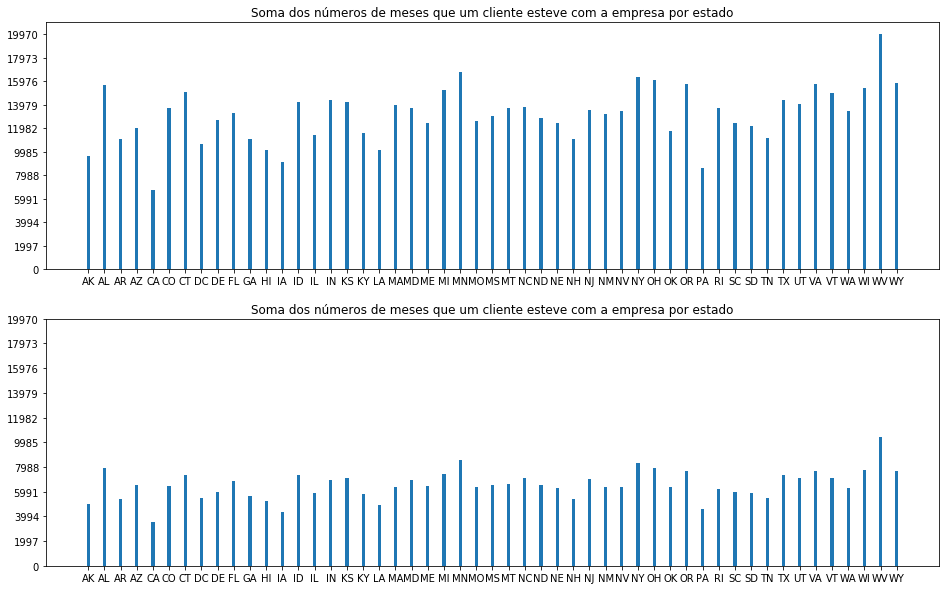

In [136]:
#estados com mais account_length (numero de meses que o clustente esteve com a provedora)

fig, ax = plt.subplots(2,1,figsize=(16,10))
states_e_minutes = df_state.groupby('state')['total_eve_minutes'].sum()
states_e_minutes_arange = np.arange(len(states_e_minutes.index))
ax[0].bar(states_e_minutes_arange, states_e_minutes.values, align='center', width=0.2)
ax[0].set_xticks(states_e_minutes_arange)
ax[0].set_xticklabels(states_e_minutes.index)
ax[0].set_title('Soma dos números de meses que um cliente esteve com a empresa por estado')

states_e_calls = df_state.groupby('state')['total_eve_calls'].sum()
states_e_calls_arange = np.arange(len(states_e_calls.index))
ax[1].bar(states_e_calls_arange, states_e_calls.values, align='center', width=0.2)
ax[1].set_xticks(states_e_calls_arange)
ax[1].set_xticklabels(states_e_calls.index)
ax[1].set_title('Soma dos números de meses que um cliente esteve com a empresa por estado')


maxi = max(states_e_minutes.values.max(),states_e_calls.values.max())
ax[0].set_yticks(range(0,int(maxi),int(maxi/10)))
ax[1].set_yticks(range(0,int(maxi),int(maxi/10)))

plt.show()


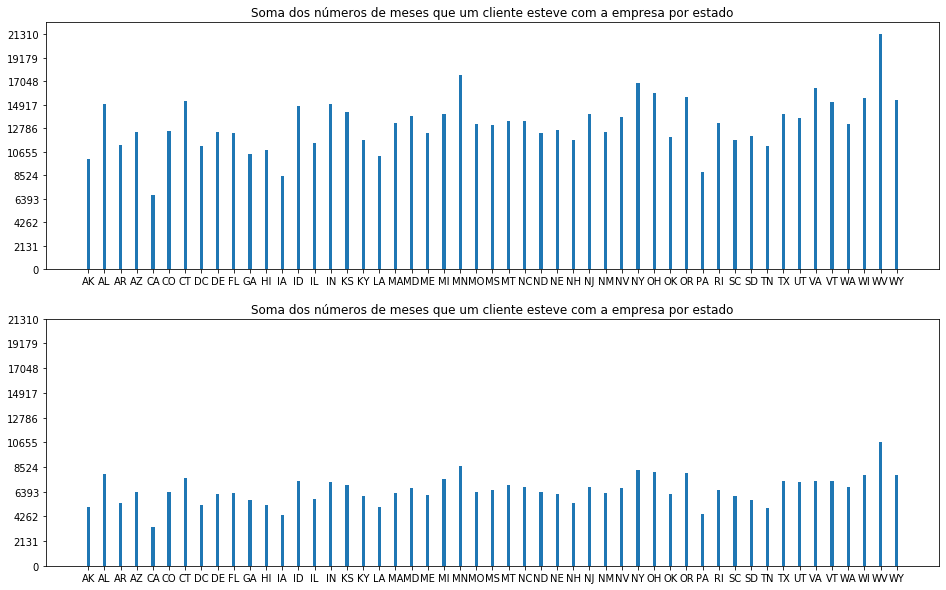

In [156]:
#estados com mais account_length (numero de meses que o clustente esteve com a provedora)

fig, ax = plt.subplots(2,1,figsize=(16,10))
states_n_minutes = df_state.groupby('state')['total_night_minutes'].sum()
states_n_minutes_arange = np.arange(len(states_n_minutes.index))
ax[0].bar(states_n_minutes_arange, states_n_minutes.values, align='center', width=0.2)
ax[0].set_xticks(states_n_minutes_arange)
ax[0].set_xticklabels(states_n_minutes.index)
ax[0].set_title('Soma dos números de meses que um cliente esteve com a empresa por estado')

states_n_calls = df_state.groupby('state')['total_night_calls'].sum()
states_n_calls_arange = np.arange(len(states_n_calls.index))
ax[1].bar(states_n_calls_arange, states_n_calls.values, align='center', width=0.2)
ax[1].set_xticks(states_n_calls_arange)
ax[1].set_xticklabels(states_n_calls.index)
ax[1].set_title('Soma dos números de meses que um cliente esteve com a empresa por estado')


maxi = max(states_n_minutes.values.max(),states_n_calls.values.max())
ax[0].set_yticks(range(0,int(maxi),int(maxi/10)))
ax[1].set_yticks(range(0,int(maxi),int(maxi/10)))

plt.show()


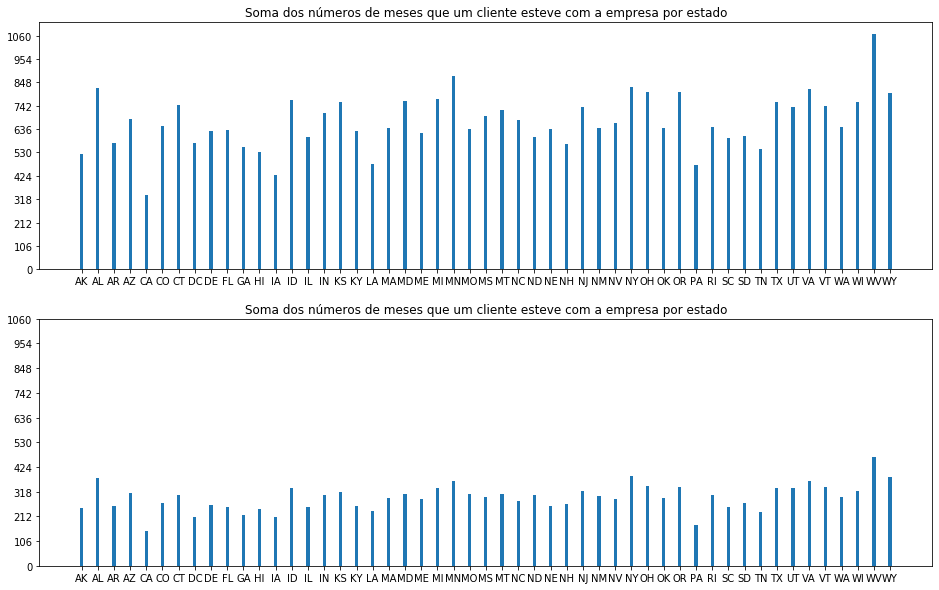

In [157]:
#estados com mais account_length (numero de meses que o clustente esteve com a provedora)

fig, ax = plt.subplots(2,1,figsize=(16,10))
states_i_minutes = df_state.groupby('state')['total_intl_minutes'].sum()
states_i_minutes_arange = np.arange(len(states_i_minutes.index))
ax[0].bar(states_i_minutes_arange, states_i_minutes.values, align='center', width=0.2)
ax[0].set_xticks(states_i_minutes_arange)
ax[0].set_xticklabels(states_i_minutes.index)
ax[0].set_title('Soma dos números de meses que um cliente esteve com a empresa por estado')

states_i_calls = df_state.groupby('state')['total_intl_calls'].sum()
states_i_calls_arange = np.arange(len(states_i_calls.index))
ax[1].bar(states_i_calls_arange, states_i_calls.values, align='center', width=0.2)
ax[1].set_xticks(states_i_calls_arange)
ax[1].set_xticklabels(states_i_calls.index)
ax[1].set_title('Soma dos números de meses que um cliente esteve com a empresa por estado')


maxi = max(states_i_minutes.values.max(),states_i_calls.values.max())
ax[0].set_yticks(range(0,int(maxi),int(maxi/10)))
ax[1].set_yticks(range(0,int(maxi),int(maxi/10)))

plt.show()


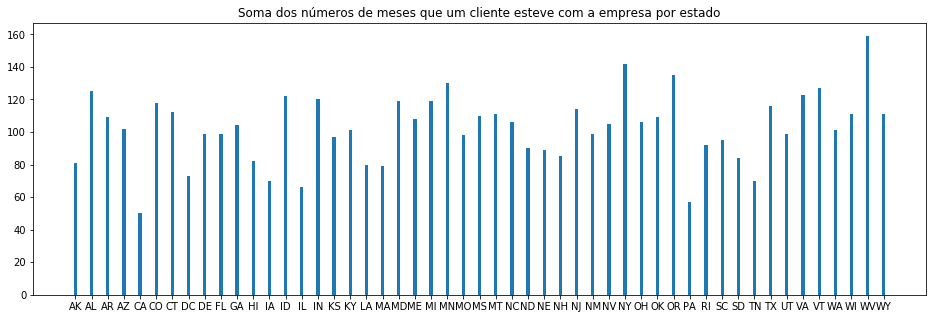

In [138]:
#estados com mais account_length (numero de meses que o clustente esteve com a provedora)

fig, ax = plt.subplots(figsize=(16,5))
states_total = df_state.groupby('state')['number_customer_service_calls'].sum()
states_total_arange = np.arange(len(states_total.index))
ax.bar(states_total_arange, states_total.values, align='center', width=0.2)
ax.set_xticks(states_total_arange)
ax.set_xticklabels(states_total.index)
ax.set_title('Soma dos números de meses que um cliente esteve com a empresa por estado')

plt.show()


## Account Length

In [139]:
df_account = arq_treino.copy()

In [144]:
#descrição
df_account[['account_length']].describe()

,account_length
count,3333.000000
mean,101.064806
std,39.822106
min,1.000000
25%,74.000000
50%,101.000000
75%,127.000000
max,243.000000


In [160]:
df_calls = df_account[['total_day_calls','total_eve_calls','total_night_calls','total_intl_calls']]
df_calls.head()

,total_day_calls,total_eve_calls,total_night_calls,total_intl_calls
0,110,99,91,3
1,123,103,103,3
2,114,110,104,5
3,71,88,89,7
4,113,122,121,3


In [162]:
df_account['total_calls'] = df_calls.sum(axis=1)

In [163]:
df_account.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,no,303
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,no,332
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,no,333
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,no,255
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,no,359


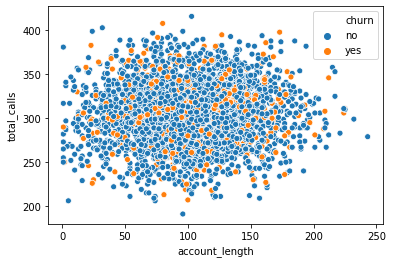

In [167]:
sns.scatterplot(data=df_account, x='account_length',y='total_calls', hue='churn')

## Area Code

In [168]:
df_area = arq_treino.copy()

,area_code,%
area_code_415,1655,49.654965
area_code_510,840,25.202520
area_code_408,838,25.142514


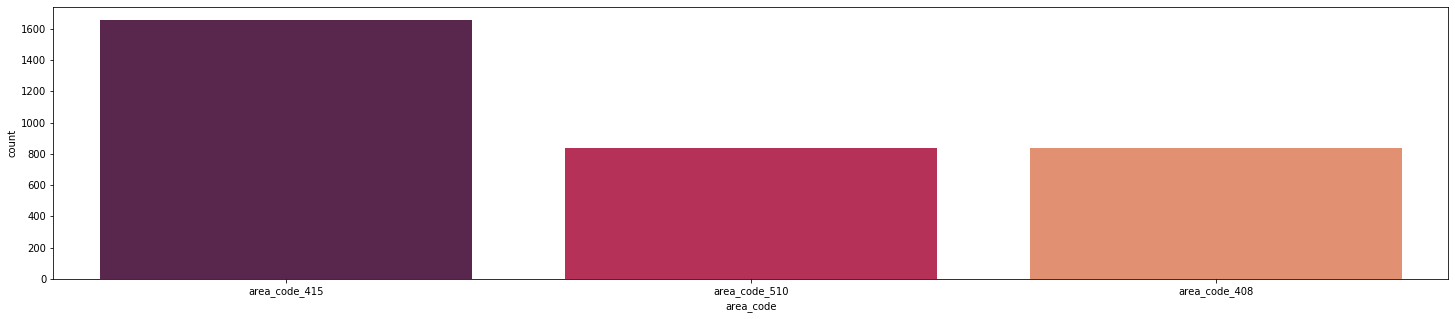

In [179]:
fig, ax = plt.subplots(figsize=(25,5))
sns.countplot(x='area_code', data=df_area, order = df_area['area_code'].value_counts().index, palette='rocket')

df = pd.DataFrame(df_area['area_code'].value_counts())
df['%'] = 100*df['area_code']/df_area.shape[0]
df

## International Plans

In [174]:
df_international = arq_treino.copy()

,international_plan,%
no,3010,90.309031
yes,323,9.690969


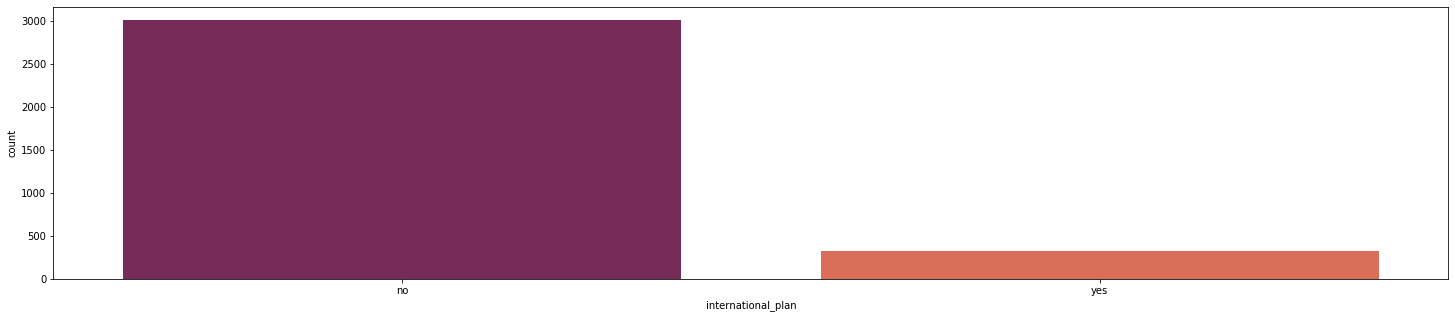

In [178]:
fig, ax = plt.subplots(figsize=(25,5))
sns.countplot(x='international_plan', data=df_international, order = df_international['international_plan'].value_counts().index, palette='rocket')
#df_international['international_plan'].value_counts()

df = pd.DataFrame(df_international['international_plan'].value_counts())
df['%'] = 100*df['international_plan']/df_international.shape[0]
df

## Voice mail plan

In [180]:
df_voice = arq_treino.copy()

,voice_mail_plan,%
no,2411,72.337234
yes,922,27.662766


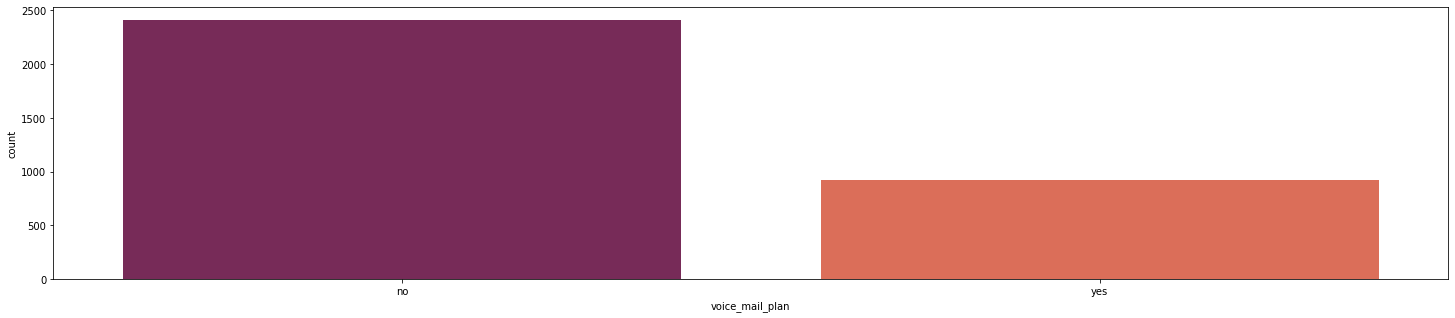

In [181]:
fig, ax = plt.subplots(figsize=(25,5))
sns.countplot(x='voice_mail_plan', data=df_voice, order = df_voice['voice_mail_plan'].value_counts().index, palette='rocket')
#df_international['international_plan'].value_counts()

df = pd.DataFrame(df_voice['voice_mail_plan'].value_counts())
df['%'] = 100*df['voice_mail_plan']/df_voice.shape[0]
df

## Variáveis não categóricas

In [184]:
df_number = arq_treino.copy()

In [193]:
df_calls = df_number.iloc[:,6:-1]
df_calls.describe()

,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


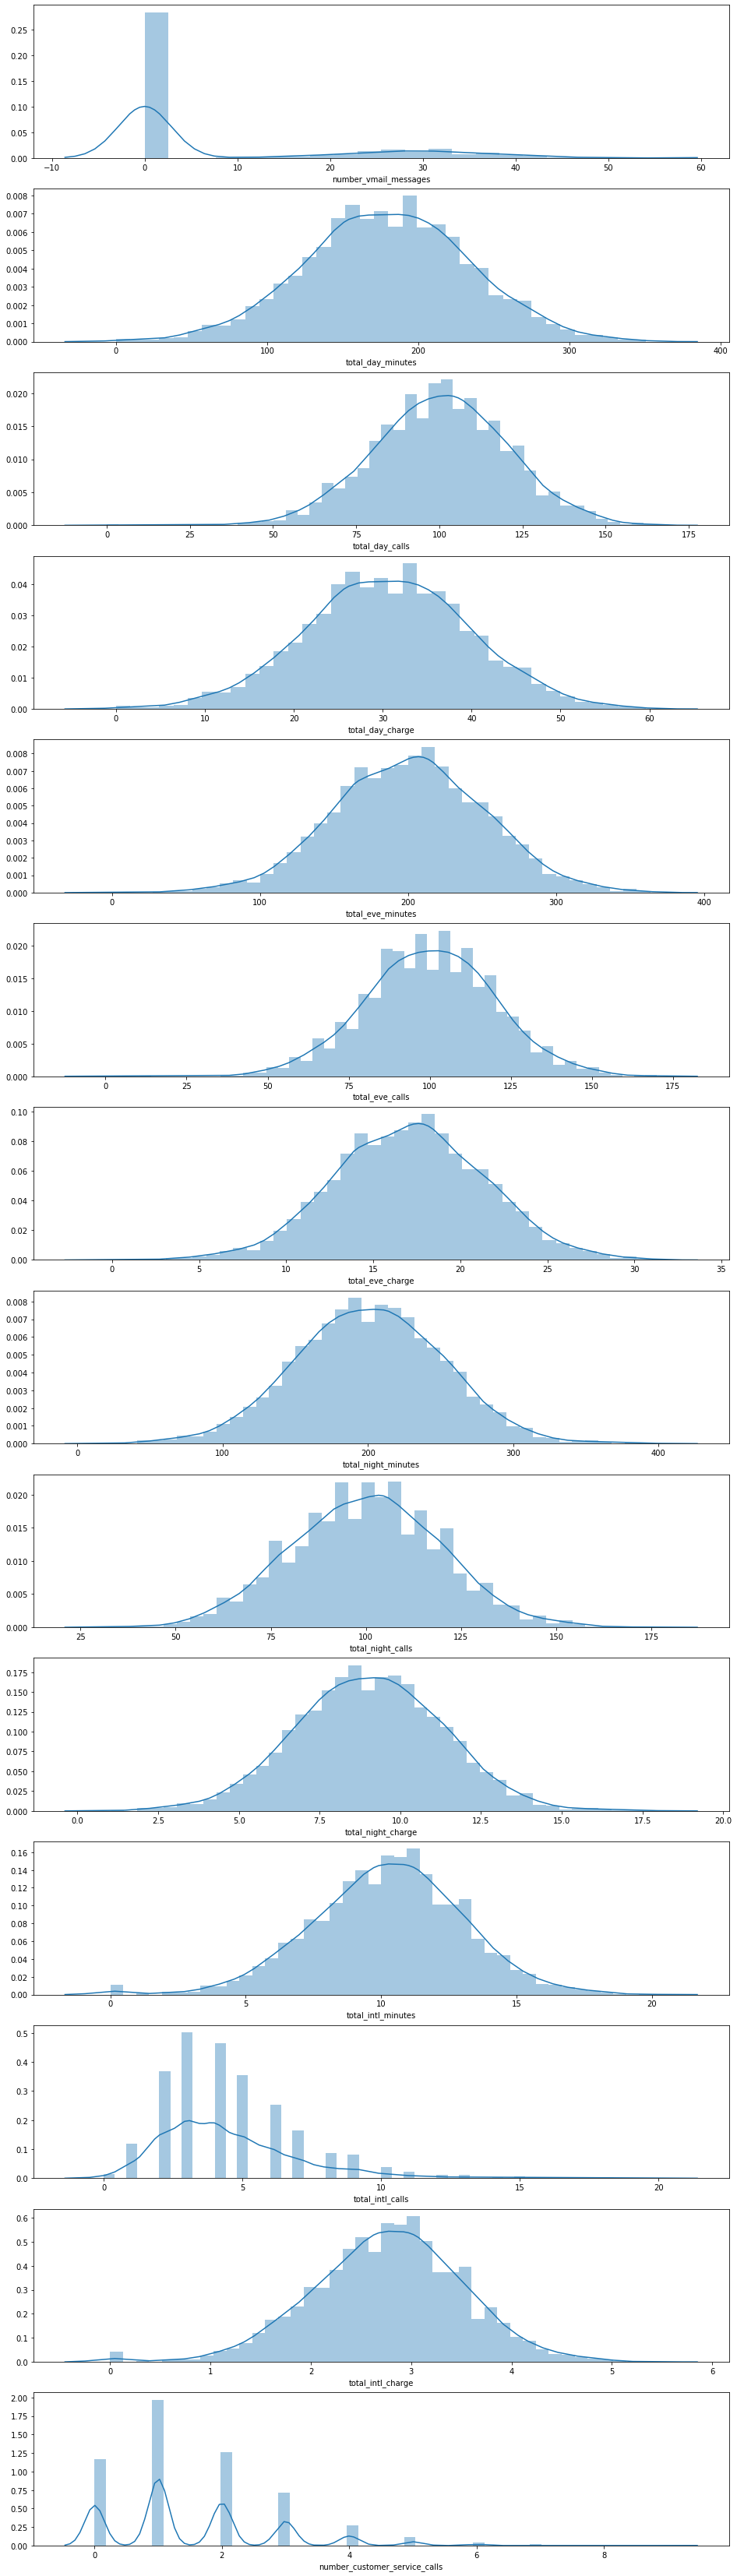

In [213]:
fig, ax = plt.subplots(df_calls.shape[1],1,figsize=(16,60))
count = 0
for i in df_calls:
    sns.distplot(df_calls[i],ax=ax[count])
    count += 1
plt.show()

# Churn

,churn,%
no,2850,85.508551
yes,483,14.491449


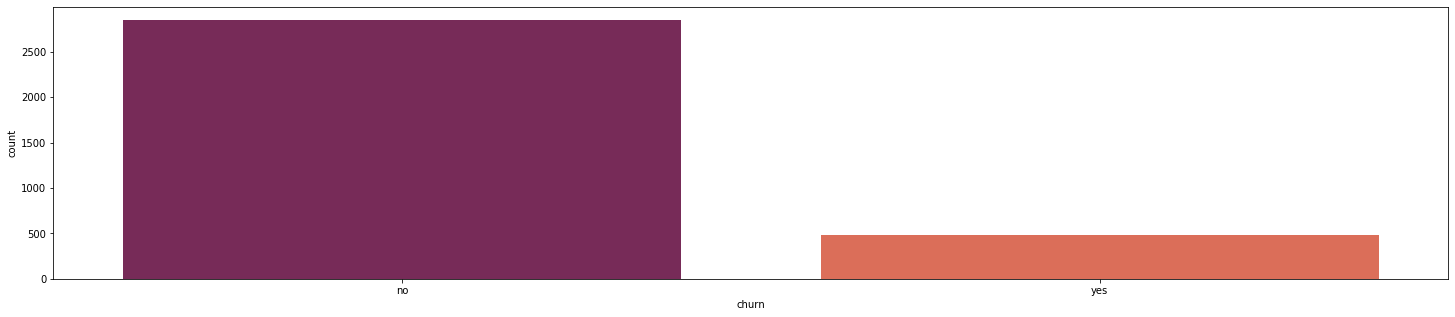

In [214]:
fig, ax = plt.subplots(figsize=(25,5))
sns.countplot(x='churn', data=arq_treino, order = arq_treino['churn'].value_counts().index, palette='rocket')
df = pd.DataFrame(arq_treino['churn'].value_counts())
df['%'] = 100*df['churn']/arq_treino.shape[0]
df

In [34]:
df_state.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
